# Data visualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
df_orig = pd.read_csv('data_full.csv')

In [3]:
print ( df_orig.head(2) )
print ( df_orig.tail(2) )

         Date        Team1  Score1  Wkt1      Team2  Score2  Wkt2 Toss Winner  \
0  2005-02-17  New Zealand     202     5  Australia     202    10   Australia   
1  2005-06-13      England     173     8  Australia     173    10     England   

  Toss Decision     Winner  
0           bat  Australia  
1           bat    England  
           Date        Team1  Score1  Wkt1     Team2  Score2  Wkt2  \
837  2020-03-10  Afghanistan     136     8   Ireland     136     7   
838  2020-03-11   Bangladesh     118     7  Zimbabwe     118     1   

    Toss Winner Toss Decision      Winner  
837     Ireland           bat         NaN  
838  Bangladesh         field  Bangladesh  


In [4]:
df_orig.shape

(839, 10)

## Total wins and win percentages for each of the top teams


In [5]:
top_teams = ['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India', \
         'Ireland', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']

Nteams = len(top_teams)

In [14]:
def get_win_data_old(dff, teams=top_teams):
    winsL = []; totsL = []; percL = []
    tossL = []
    for team in teams:
        wins = sum ( dff['Winner']==team )
        tot  = sum ( (dff['Team1']==team ) | (dff['Team2']==team ) )
        toss = sum ( dff['Toss Winner']==team )
        
        winsL.append(wins)
        totsL.append(tot)
        percL.append(100*wins/tot)
        
        tossL.append(toss)
    
    return pd.DataFrame({'Total Matches':totsL, 'Total Wins': winsL,
                         'Win Percentage': np.array(percL).round(2),
                         'Toss':tossL},
                        index=teams)
    

In [15]:
def get_win_data(dff, teams=top_teams):
    totsL = []; 
    winsL = []; win_percL = []
    tossL = []; toss_percL = []
    for team in teams:
        wins = sum ( dff['Winner']==team )
        tot  = sum ( (dff['Team1']==team ) | (dff['Team2']==team ) )
        toss = sum ( dff['Toss Winner']==team )

        totsL.append(tot)
        winsL.append(wins)
        win_percL.append(100*wins/tot)
        
        tossL.append(toss)
        toss_percL.append(100*toss/tot)
    
    return pd.DataFrame({'Total Matches':totsL,
                         'Total Wins': winsL, 'Win Percentage': np.array(win_percL).round(2),
                         'Toss Won':tossL, 'Toss Percentage': np.array(toss_percL).round(2)},
                        index=teams)
    

In [16]:
df_orig.columns
df = get_win_data(df_orig)
df

,Total Matches,Total Wins,Win Percentage,Toss Won,Toss Percentage
Afghanistan,69,45,65.22,33,47.83
Australia,104,56,53.85,52,50.00
Bangladesh,74,24,32.43,38,51.35
England,107,54,50.47,53,49.53
India,104,62,59.62,50,48.08
Ireland,78,35,44.87,44,56.41
New Zealand,114,56,49.12,58,50.88
Pakistan,123,68,55.28,64,52.03
South Africa,111,63,56.76,51,45.95
Sri Lanka,110,53,48.18,50,45.45


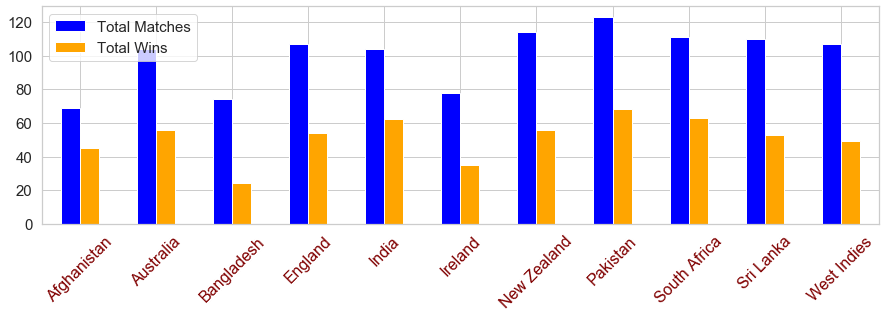

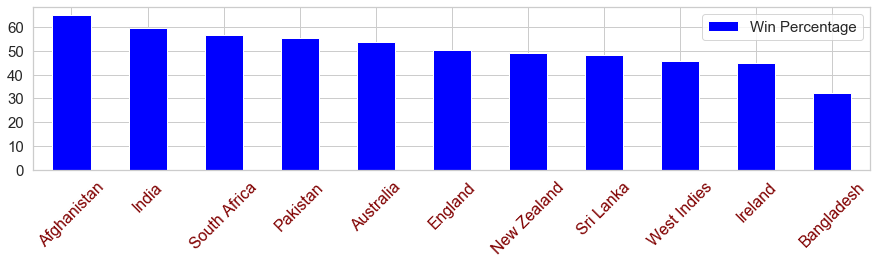

In [17]:
df.plot.bar(y=['Total Matches', 'Total Wins'],rot=0, figsize=(15,4), color=['blue', 'orange'])
plt.xticks(fontsize=16, rotation=45, color='maroon');
plt.yticks(fontsize=15);
plt.legend(fontsize=15);

df.sort_values(by='Win Percentage',ascending=False).plot.bar(y=['Win Percentage'], figsize=(15,3), color='blue')
plt.xticks(fontsize=16, rotation=45, color='maroon');
plt.yticks(fontsize=15);
plt.legend(fontsize=15);

### Taking matches only among the top teams
I was a little surprised to learn that Afganistan had the highest win percentages among all the top cricket playing nations. Which after discussing with Aditya that this might be due to the fact that Afganistan have played a lot of games against the bottom teams, so the win percentage might be a little biased. So the better result would be to calculate the win percentage when played only among the top teams.

In [9]:
def filter_data(df, teams=top_teams):
    # filter the data frame so that only the matches between the top teams remain in it
    # So, removing the rows with the bottom teams would do it.
    df = pd.read_csv('data_full.csv')
    all_teams = list( df['Team1'].unique() ) + list( df['Team2'].unique() )
    all_teams = list(set(all_teams))  # remove the duplicates

    bottom_teams = [x for x in all_teams if x not in top_teams]
    #bottom_teams = list( set(all_teams)-set(top_teams) )
    
    # Now remove all the bottom teams from dataframe
    for team in bottom_teams:
        df.drop(df[df['Team1'] == team].index, inplace=True)
        df.drop(df[df['Team2'] == team].index, inplace=True)
    return df


In [18]:

df_filter = filter_data(df_orig)
df = get_win_data(df_filter)
df.sort_values(by='Win Percentage',ascending=False)


,Total Matches,Total Wins,Win Percentage,Toss Won,Toss Percentage
India,96,56,58.33,46,47.92
South Africa,106,58,54.72,49,46.23
Australia,103,56,54.37,51,49.51
England,104,53,50.96,51,49.04
Pakistan,111,56,50.45,60,54.05
Afghanistan,33,16,48.48,15,45.45
Sri Lanka,105,48,45.71,48,45.71
West Indies,104,47,45.19,55,52.88
New Zealand,105,47,44.76,53,50.48
Bangladesh,54,10,18.52,29,53.70


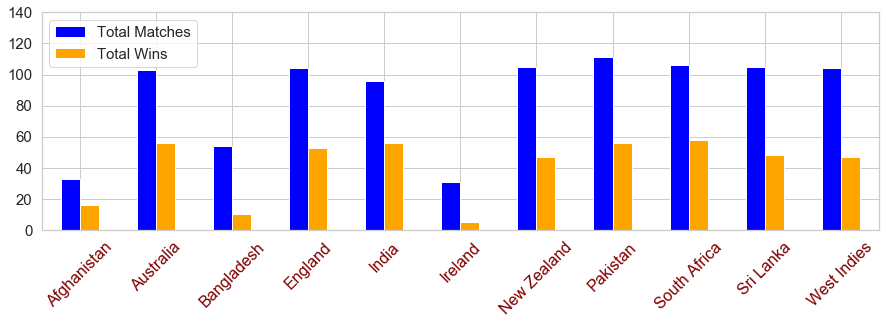

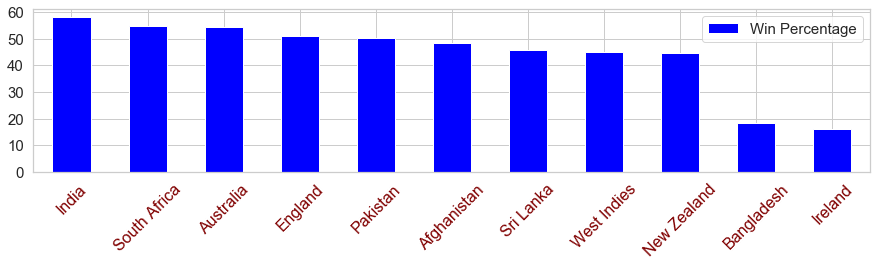

In [19]:
df.plot.bar(y=['Total Matches', 'Total Wins'], rot=0, ylim=[0,140], figsize=(15,4), color=['blue', 'orange'])
plt.xticks(fontsize=16, rotation=45, color='maroon');
plt.yticks(fontsize=15);
plt.legend(fontsize=15,loc='best');

df.sort_values(by='Win Percentage',ascending=False).plot.bar(y=['Win Percentage'], figsize=(15,3), color='blue')
#dff.plot.bar(y=['Win Percentage'],rot=0, figsize=(15,4), color='blue')
plt.xticks(fontsize=16, rotation=45, color='maroon');
plt.yticks(fontsize=15);
plt.legend(fontsize=15, loc='best');

# Toss Advantage

In [22]:
df.columns

Index(['Total Matches', 'Total Wins', 'Win Percentage', 'Toss Won',
       'Toss Percentage'],
      dtype='object')

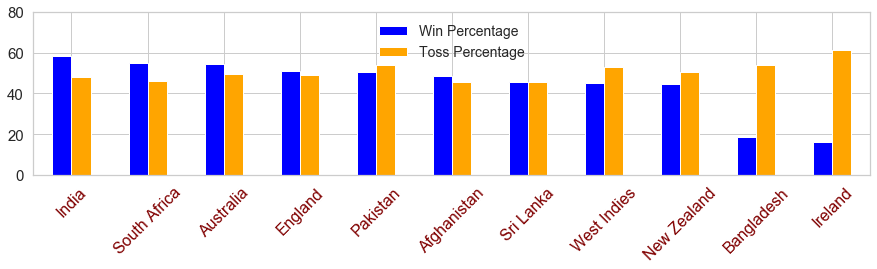

In [30]:
df.sort_values(by='Win Percentage',ascending=False).plot.bar(y=['Win Percentage', 'Toss Percentage'],
                                                             figsize=(15,3),
                                                             ylim=[0,80],
                                                             color=['blue', 'orange'])
#dff.plot.bar(y=['Win Percentage'],rot=0, figsize=(15,4), color='blue')
plt.xticks(fontsize=16, rotation=45, color='maroon');
plt.yticks(fontsize=15);
plt.legend(fontsize=14, loc='upper center', frameon=False);
#df.sort_values(by='Win Percentage',ascending=False).plot.bar(y=['Toss'], figsize=(15,3), color='blue')
#dff.plot.bar(y=['Win Percentage'],rot=0, figsize=(15,4), color='blue')
#plt.xticks(fontsize=16, rotation=45, color='maroon');
#plt.yticks(fontsize=15);
#plt.legend(fontsize=15, loc='best');


In [39]:
df_test = pd.read_csv('data_full.csv')
df_test['Date']#.dt.strftime("%m-%d")

#df["Date"].dt.strftime("%m/%d/%y")

0      2005-02-17
1      2005-06-13
2      2005-10-21
3      2006-01-09
4      2006-02-16
          ...    
834    2020-03-08
835    2020-03-08
836    2020-03-09
837    2020-03-10
838    2020-03-11
Name: Date, Length: 839, dtype: object

In [45]:
#import datetime as dt
df = pd.read_csv('data_full.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.strftime("%m-%d")


0      02-17
1      06-13
2      10-21
3      01-09
4      02-16
       ...  
834    03-08
835    03-08
836    03-09
837    03-10
838    03-11
Name: Date, Length: 839, dtype: object